# Task 3 - Exploratory Data Analysis - Retail

# Author - Aatmaja Joshi

### Details
- Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'.
- As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?

## Importing Libraries

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})

## Importing the dataset

In [4]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploring the Dataset

In [5]:
df.shape

(9994, 13)

In [54]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- There no null values
- We will drop the 'Country' and 'Postal Code' columns as they are irrelevant to the dataset

In [9]:
df.drop(['Country'], axis = 1, inplace = True)
df.drop(['Postal Code'], axis = 1, inplace = True)

In [10]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Exploratory Data Analysis - Retail

In [17]:
# Drop non-numeric columns from DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


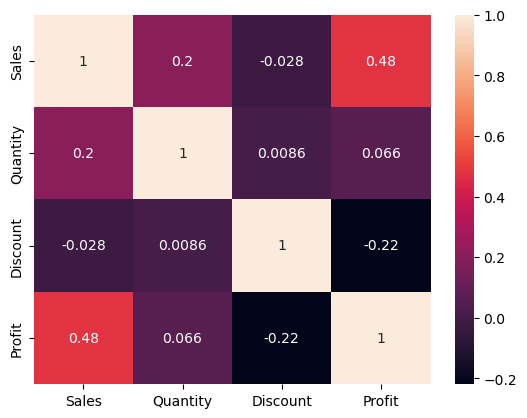

In [21]:
sns.heatmap(correlation_matrix, annot = True)
plt.show()

- A value of 0.48 indicates that there is a positive correlation between Profit and Sales.
- A value of -0.22 indicates that there is a negative correlation between Profit and Discount.

## Analyzing the relationship between Profit, Sales and Discount

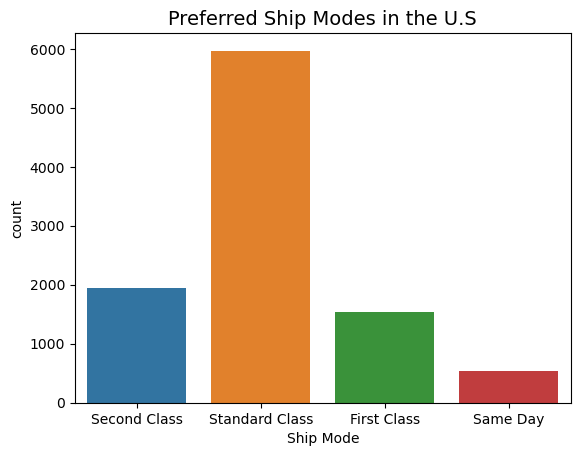

In [91]:
# Visualizing which ship mode is most preferred
sns.countplot(data = df, x ='Ship Mode')
plt.title('Preferred Ship Modes in the U.S', fontsize = 14)
plt.show()

### Standard Class is the most preferred Ship Mode

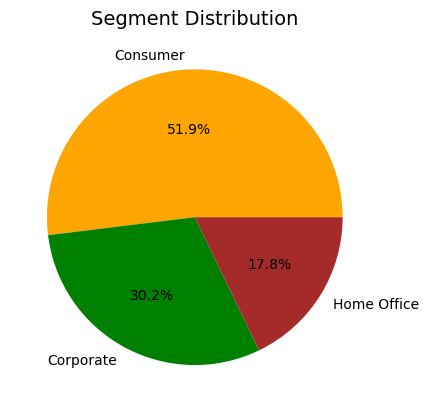

In [92]:
# Visualizing the frequency for each Segment
color = ['orange', 'green', 'brown']
plt.pie(df['Segment'].value_counts(),labels = df['Segment'].value_counts().index, autopct = '%1.1f%%', colors = color)
plt.title('Segment Distribution', fontsize=14)
plt.show()

### Consumer contributes to maximum sales

In [29]:
## Groups the 'State' by sum of Sales and Profit
x = df.groupby('State')[['Sales', 'Profit']].sum()
print(x.head())

                  Sales      Profit
State                              
Alabama      19510.6400   5786.8253
Arizona      35282.0010  -3427.9246
Arkansas     11678.1300   4008.6871
California  457687.6315  76381.3871
Colorado     32108.1180  -6527.8579


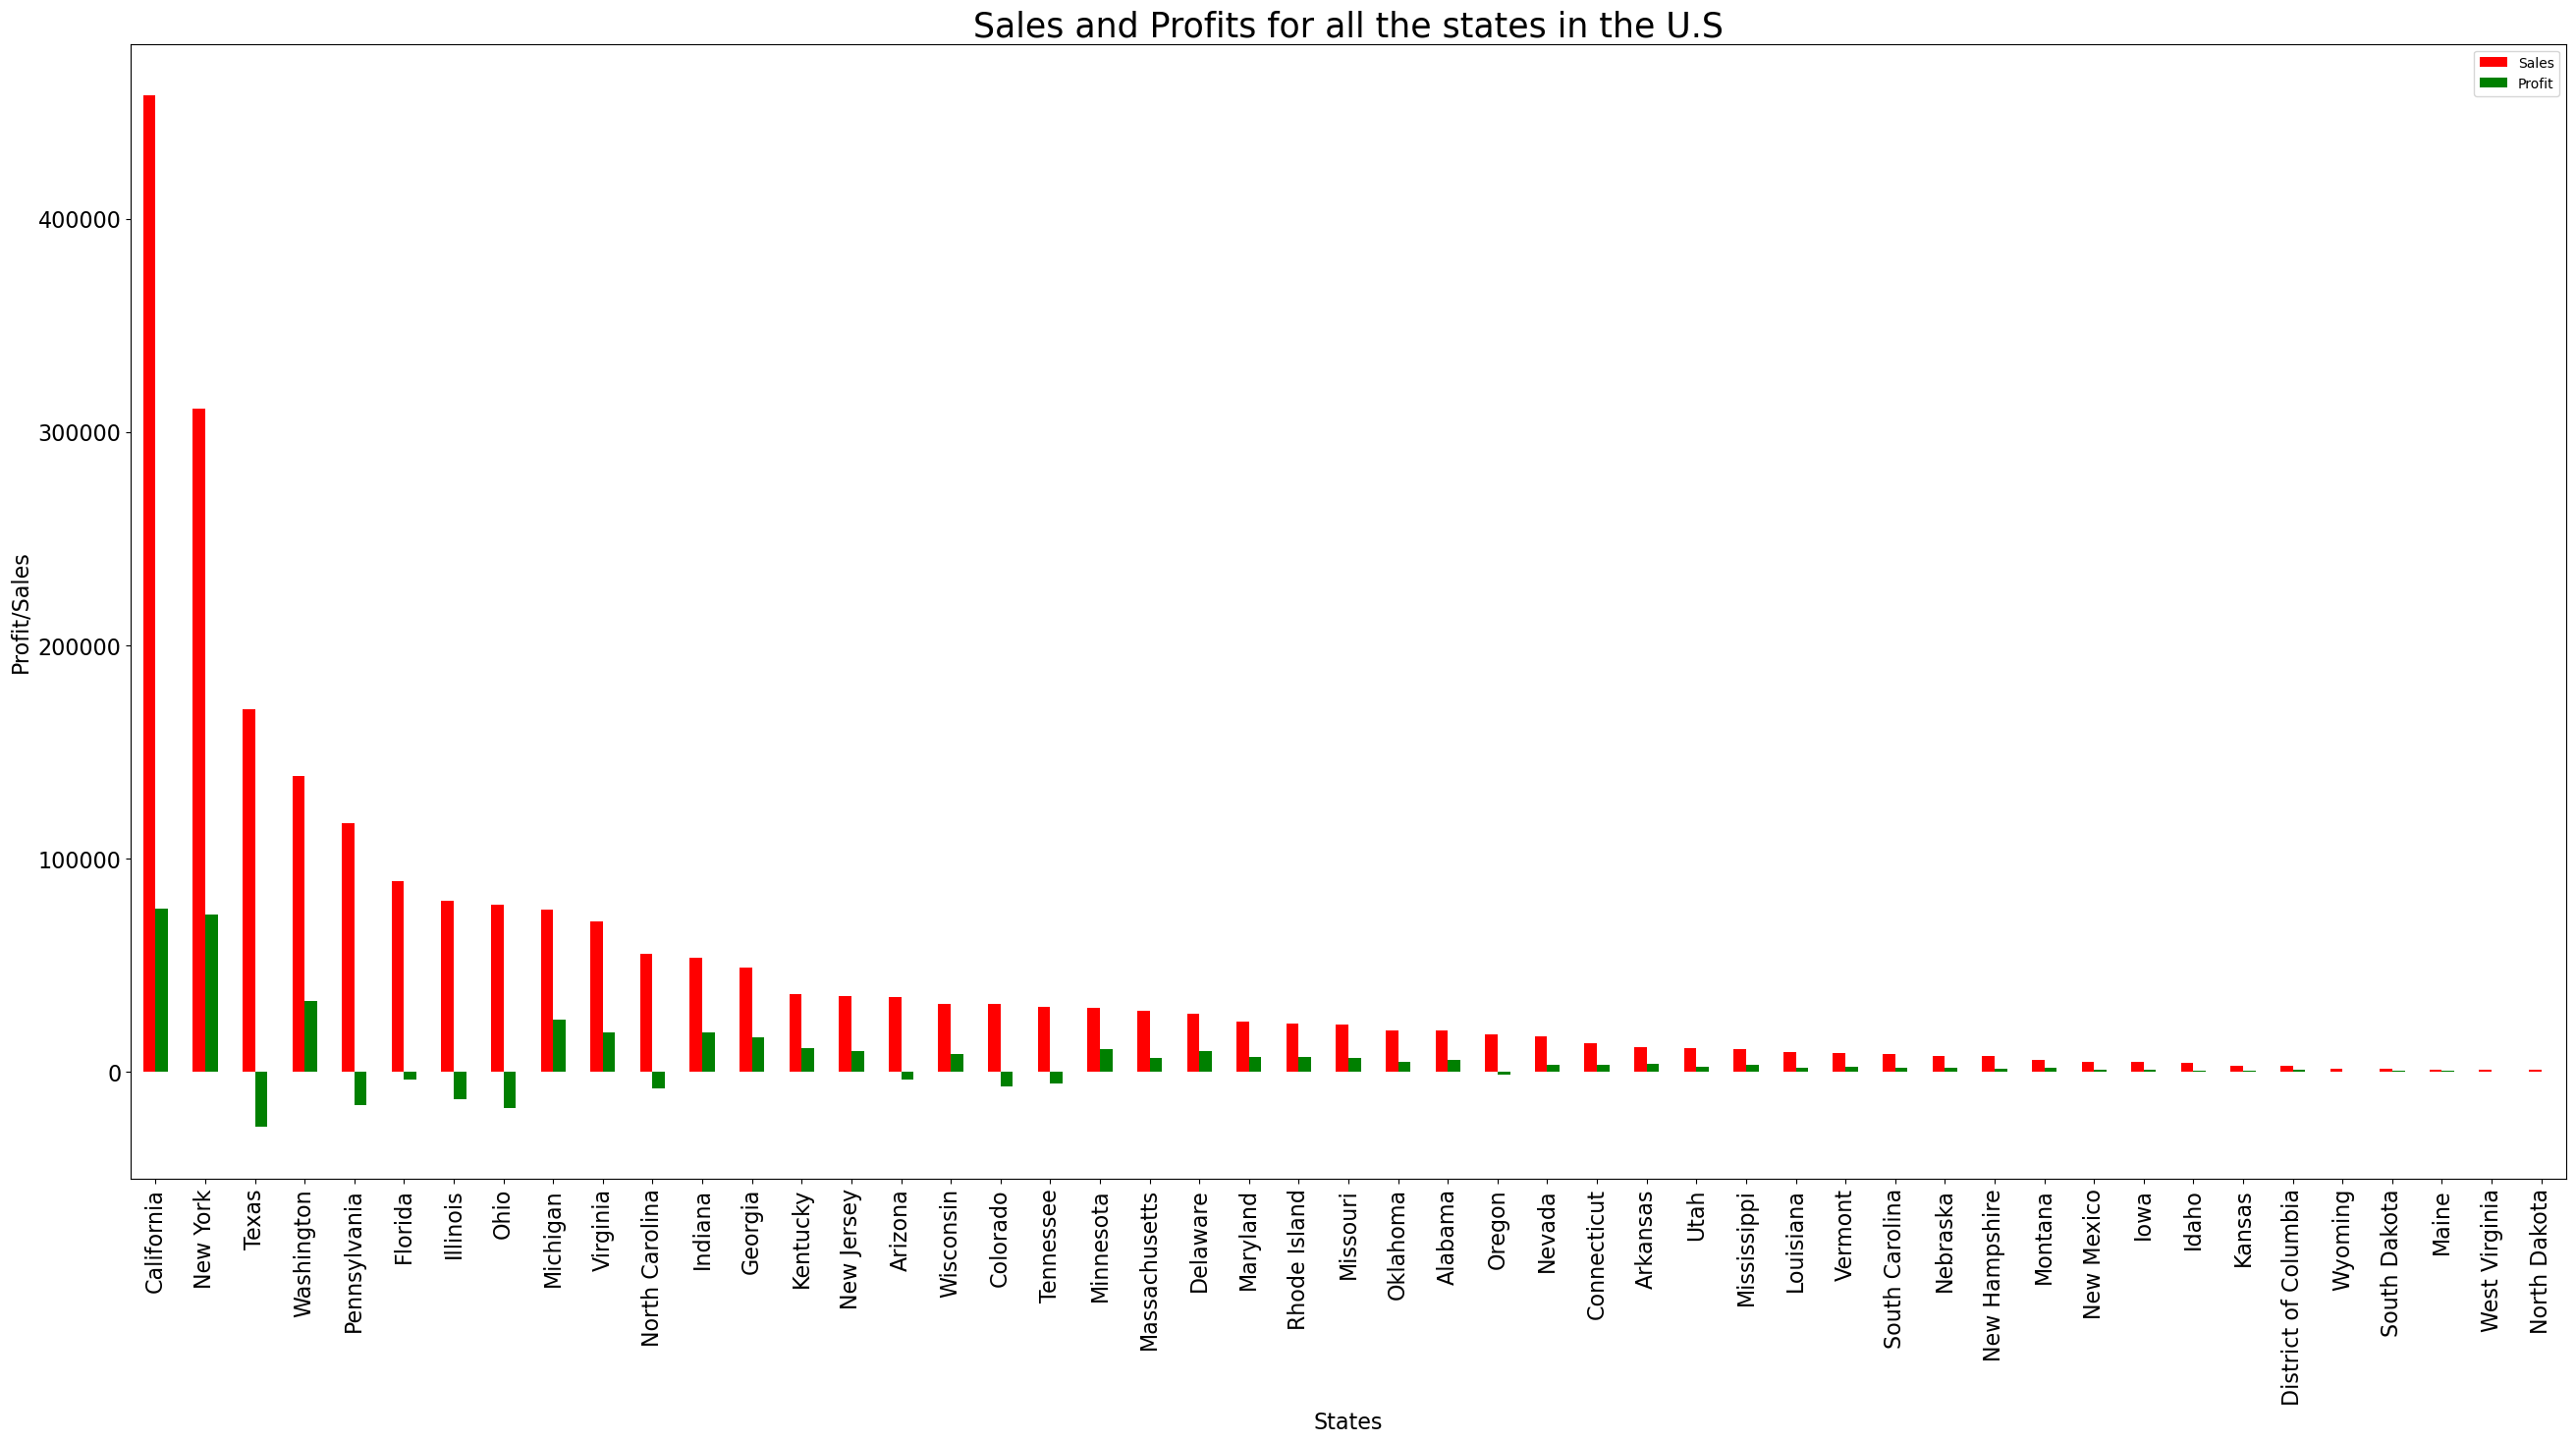

In [32]:
# Visualizing the Profit/Sales from state 
sales = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by = 'Sales', ascending = False)
sales.plot.bar(color = ['red', 'green'], figsize = (32, 15))
plt.xlabel('States', fontsize = 16)
plt.ylabel('Profit/Sales', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Sales and Profits for all the states in the U.S', fontsize = 25)
plt.show()

- Maximum sales and profit happen to be in california and new york
- West Virginia and North Dakota have minimum sales
- Maximum losses are from Texas

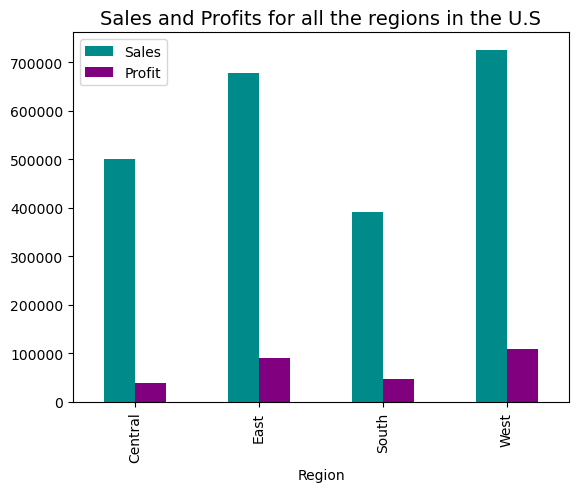

In [61]:
# Visualizing the region by 'Sales' and 'Profit'
reg = df.groupby('Region')[['Sales', 'Profit']].sum()
reg.plot.bar(color = ['darkcyan', 'purple'])
plt.title('Sales and Profits for all the regions in the U.S', fontsize = 14)
plt.show()

- West Region makes maximum sales
- Central Region makes minimum profit

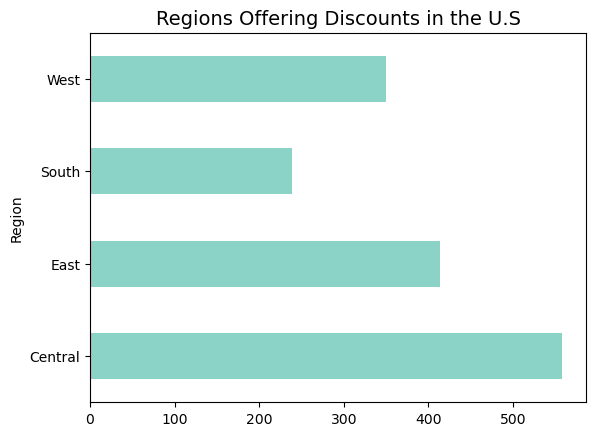

In [88]:
# Visualizing the region by Discount
disc = df.groupby('Region')['Discount'].sum()
disc.plot.barh(color = "#8bd3c7")
plt.ylabel('Region', fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Regions Offering Discounts in the U.S', fontsize=14)
plt.show()

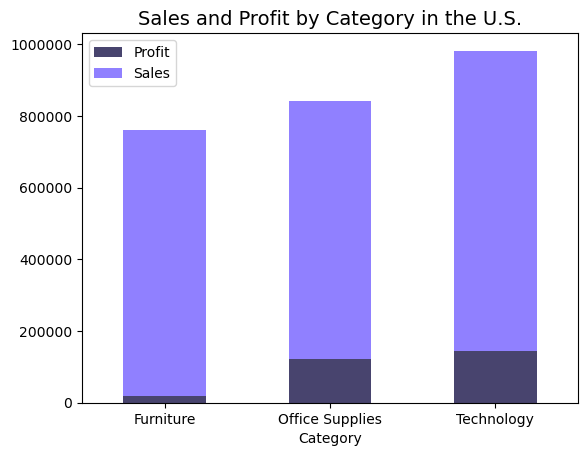

In [89]:
# Visualizing the category by 'Profit' and 'Sales'
cgory = df.groupby('Category')[['Profit', 'Sales']].sum()
cgory.plot.bar(stacked=True, rot=0, color=[ "#48446e", "#9080ff"])

# Set y-axis tick labels format to non-scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Sales and Profit by Category in the U.S.', fontsize=14)
plt.show()


- Technology contributes to maximum sales and while furniture makes the least profit.

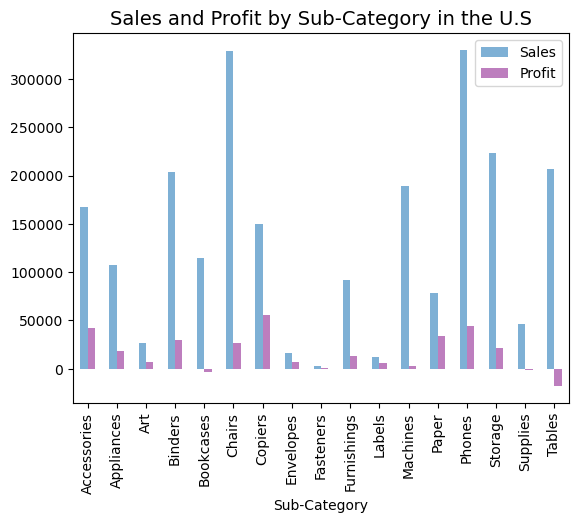

In [87]:
# Visualizing the sub-category by 'Sales' and 'Profit'
scgory = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()
scgory.plot.bar(color = ["#7eb0d5", "#bd7ebe"])
plt.xlabel('Sub-Category', fontsize = 10)
plt.xticks(fontsize = 10)
plt.title('Sales and Profit by Sub-Category in the U.S', fontsize=14)
plt.show()

- Chairs and Phones contribute to maximum sales.
- Tables and Bookcases contribute to maximum losses.

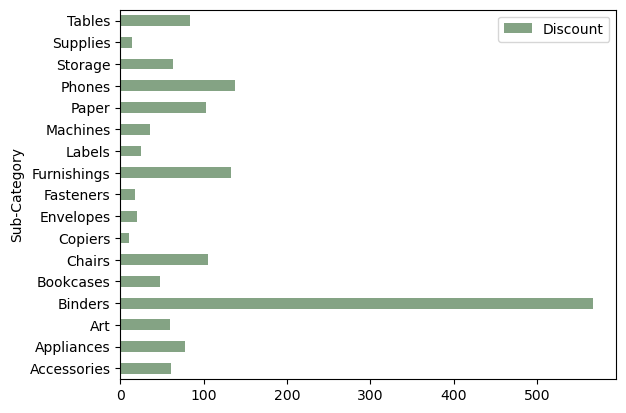

In [85]:
# Visualizing the Sub-Category by 'Discount'
sdisc = df.groupby('Sub-Category')[['Discount']].sum()
sdisc.plot.barh(color = (0.2, 0.4, 0.2, 0.6 ))
plt.show()

- Maximum Discounts are given on Binders and minimum on Copiers.

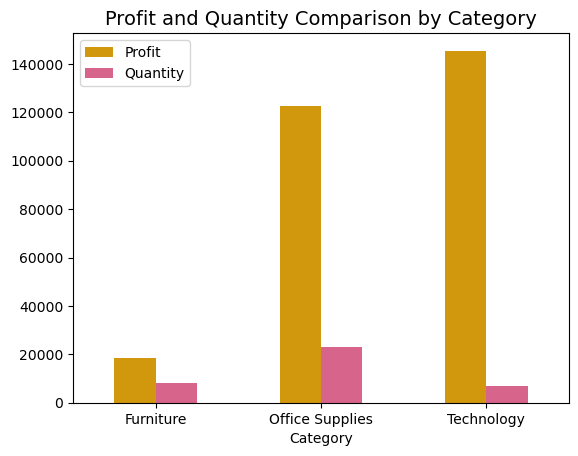

In [98]:
# Visualizing the Category by 'Profit' and 'Qunatity'
catgory = df.groupby('Category')[['Profit','Quantity']].sum()
catgory.plot.bar(color = ["#d2980d", "#d7658b"], rot = 0)
plt.title('Profit and Quantity Comparison by Category', fontsize=14)
plt.show()

- Technology makes maximum profit,with minimum quantities being sold.
- Furniture makes least profit.

## Consclusion
- Sales need to be improved in states like North Dakota, West Virginia, Maine.
- Texas, Pennsylvania, Ohio suffer from losses. Adequate measures need to be adopted to make their sales profitable.
- Since the Central region makes minimum profit and offers maximum discount, their sales can be made more profitable by reducing the discounts.
- Furniture makes minimum profit, but has relatively high sales. The sales should be reduced to not incur loss in the future.
- Tables and bookcases cause maximum losses. Improvements need to be made in order to gain profit from their sales by either reducing the discount, or other means.
- The least quantity of items sold are copiers among all the other sub categories. However, they contribute towards highest amount of profit. Changes should be done to increase their sales.